In [1]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [2]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'D:\Dataset\Very_Mild_Demented\*')
mild = glob(r'D:\Dataset\Mild_Demented\*')
moderate = glob(r'D:\Dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'D:\Dataset\Non_Demented\*')

One of the data in Non Alzheimer Folder
Image shape: (128, 128)


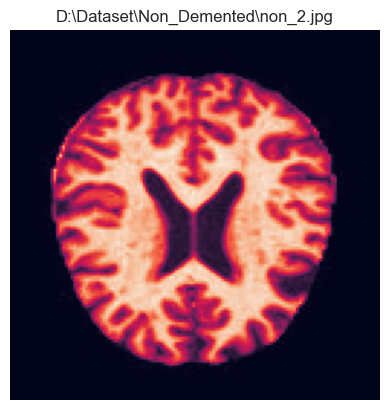

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming non and moderate are lists of file paths
non = [r"D:\Dataset\Non_Demented\non.jpg", r"D:\Dataset\Non_Demented\non_2.jpg", ...]
moderate = [r"D:\Dataset\Moderate_Demented\moderate.jpg", r"D:\Dataset\Moderate_Demented\moderate_2.jpg", ...]

def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape: {img.shape}')
    plt.show()  # Display the image

print('One of the data in Non Alzheimer Folder')
view_image(non[1])  # Assuming non[1] is a valid image file path

Alzheimer Patient's Brain
Image shape: (128, 128)


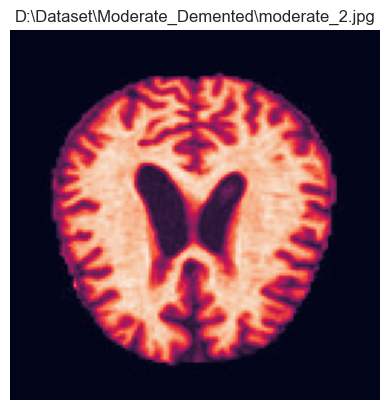

In [7]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])  # Assuming moderate[1] is a valid image file path

In [9]:
import os
from PIL import Image
import numpy as np

# List where arrays shall be stored
resized_image_array = []
# List that will store the corresponding labels (0 for non, 1 for others)
resized_image_array_label = []

width = 256
height = 256
new_size = (width, height)

# Define the paths to image directories
very_mild = r"D:\Dataset\Very_Mild_Demented"
mild = r"D:\Dataset\Mild_Demented"
moderate = r"D:\Dataset\Moderate_Demented"
non = r"D:\Dataset\Non_Demented"

# Iterate over pictures and resize them to 256 by 256
def resizer(image_directory, label):
    for file in os.listdir(image_directory):
        img_path = os.path.join(image_directory, file)
        img = Image.open(img_path)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width * height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        resized_image_array_label.append(label)  # Append the label for this image

# Resize images and populate arrays
resizer(non, 0)  # Label 0 for "non" category
resizer(very_mild, 1)  # Label 1 for "very_mild" category
resizer(mild, 1)  # Label 1 for "mild" category
resizer(moderate, 1)  # Label 1 for "moderate" category

# Combine image directories for "ALZ" category
ALZ = [very_mild, mild, moderate]
for directory in ALZ:
    resizer(directory, 1)  # Label 1 for "ALZ" category


In [10]:
from sklearn.model_selection import train_test_split

# Print the lengths of non and ALZ to verify the number of images
print(len(non))  # Number of images in "non" category
print(len(ALZ))  # Number of images in other categories combined

# Print the total number of resized images and check an example image
print(len(resized_image_array))  # Total number of resized images
print(resized_image_array[1])  # Check an example image (numpy array representation)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size=0.2)

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_x)}")
print(f"Testing data size: {len(test_x)}")


23
3
9600
[0 0 0 ... 0 0 0]
Training data size: 7680
Testing data size: 1920


In [11]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :')
print(metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8803385416666667
Precision :  0.8620392697209783
Recall :  0.9769666211204372
f1 :  0.9159117943087199
Confusion matrix :
[[1756  801]
 [ 118 5005]]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

# Assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', accuracy_score(y_true, y_pred))
print('Precision : ', precision_score(y_true, y_pred, average='weighted', zero_division='warn'))  # Choose appropriate average parameter and set zero_division to 'warn'
print('Recall : ', recall_score(y_true, y_pred, average='weighted', zero_division='warn'))  # Choose appropriate average parameter and set zero_division to 'warn'
print('F1 : ', f1_score(y_true, y_pred, average='weighted', zero_division='warn'))  # Choose appropriate average parameter and set zero_division to 'warn'
print('Confusion matrix :')
cm = confusion_matrix(y_true, y_pred)
print(cm)

Accuracy :  0.8427083333333333
Precision :  0.8512341219096335
Recall :  0.8427083333333333
F1 :  0.8328401473942204
Confusion matrix :
[[ 383  260]
 [  42 1235]]


In [9]:
!pip install joblib

In [21]:
import joblib

# Assuming 'clf' is your trained SVM model
# Save the trained model to a file
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']

In [23]:
from PIL import Image
import numpy as np
import joblib  # Use joblib to load your trained SVM model

# Load your trained SVM model
clf = joblib.load('svm_model.pkl')

# Function to preprocess the uploaded image
def preprocess_uploaded_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize to 256x256 pixels (adjust as needed)
    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.reshape(1, -1)  # Flatten the image array
    return img_array

# Function to check if uploaded image is detected as Alzheimer's
def check_uploaded_image(image_path, model):
    img_array = preprocess_uploaded_image(image_path)
    prediction = model.predict(img_array)[0]
    if prediction == 1:
        result = "Detected as Alzheimer's"
    else:
        result = "Not detected as Alzheimer's"
    return result

# Example usage (replace 'path/to/your/image.jpg' with the actual path):
uploaded_image_path = r'D:\Dataset\Non_Demented\non_3.jpg'
detection_result = check_uploaded_image(uploaded_image_path, clf)

print("Detection Result:", detection_result)


Detection Result: Detected as Alzheimer's


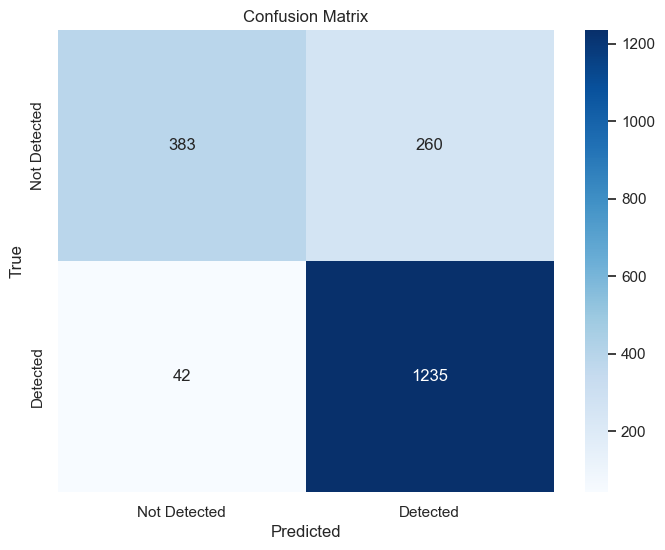

In [35]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Class labels
class_labels = ["Not Detected", "Detected"]

# Plot confusion matrix
plot_confusion_matrix(cm, class_labels)

ALZHEIMER CLASSIFIER

In [23]:
import os

# List where arrays shall be stored
resized_image_array = []
resized_image_array_label = []

width = 256
height = 256
new_size = (width, height)

# Define the paths to image directories
very_mild = r"D:\Dataset\Very_Mild_Demented"
mild = r"D:\Dataset\Mild_Demented"
moderate = r"D:\Dataset\Moderate_Demented"
non = r"D:\Dataset\Non_Demented"

# Iterative function to resize images and populate arrays
def resizer(image_directory, label):
    for file in os.listdir(image_directory):
        img_path = os.path.join(image_directory, file)
        img = Image.open(img_path)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width * height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        resized_image_array_label.append(label)

# Resize images and populate arrays
resizer(non, 0)  # Non-Demented label: 0
resizer(very_mild, 1)  # Very Mild Demented label: 1
resizer(mild, 2)  # Mild Demented label: 2
resizer(moderate, 3)  # Moderate Demented label: 3

# Convert lists to numpy arrays
resized_image_array = np.array(resized_image_array)
resized_image_array_label = np.array(resized_image_array_label)

In [24]:
#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_x)}")
print(f"Testing data size: {len(test_x)}")

Training data size: 5120
Testing data size: 1280


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a SVM using RBF kernel
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)

# Store predictions and ground truth for training data
y_pred_train = clf.predict(train_x)
y_true_train = train_y

# Assess the performance of the SVM with RBF kernel on Training data
print('Training Data Performance:')
print('Accuracy:', accuracy_score(y_true_train, y_pred_train))
print('Precision:', precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall:', recall_score(y_true_train, y_pred_train, average='macro'))
print('F1 Score:', f1_score(y_true_train, y_pred_train, average='macro'))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_true_train, y_pred_train))

Training Data Performance:
Accuracy: 0.8162109375
Precision: 0.649543935439924
Recall: 0.5540960417886603
F1 Score: 0.5787594196874574
Confusion matrix:
[[2443  116    1    0]
 [ 410 1381    0    0]
 [ 158  210  355    0]
 [  10   36    0    0]]


C:\Users\Jainivas Anandhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Store predictions and ground truth for testing data
y_pred_test = clf.predict(test_x)
y_true_test = test_y

# Assess the performance of the SVM with RBF kernel on Testing data
print('Testing Data Performance:')
print('Accuracy:', accuracy_score(y_true_test, y_pred_test))
print('Precision:', precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall:', recall_score(y_true_test, y_pred_test, average='macro'))
print('F1 Score:', f1_score(y_true_test, y_pred_test, average='macro'))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_true_test, y_pred_test))

Testing Data Performance:
Accuracy: 0.7625
Precision: 0.6207332809856756
Recall: 0.5010209746771889
F1 Score: 0.5221919190321898
Confusion matrix:
[[592  48   0   0]
 [128 321   0   0]
 [ 38  72  63   0]
 [  5  13   0   0]]


C:\Users\Jainivas Anandhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


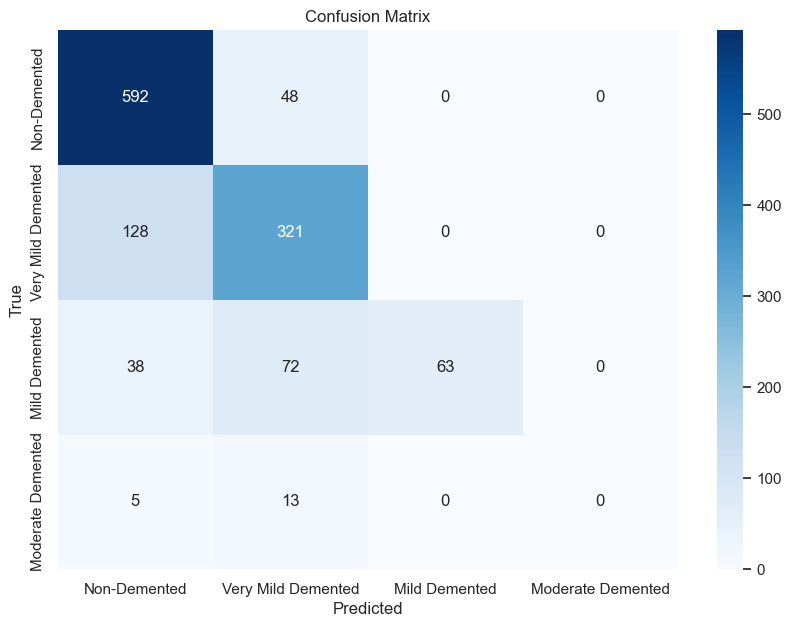

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true_test, y_pred_test, labels):
    cm = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

class_labels = ["Non-Demented", "Very Mild Demented", "Mild Demented", "Moderate Demented"]
plot_confusion_matrix(test_y, y_pred_test, class_labels)

In [43]:
import joblib

# Assuming 'clf' is your trained SVM model
# Save the trained model to a file
joblib.dump(clf, 'svm_model2.pkl')

['svm_model2.pkl']

In [53]:
from PIL import Image
import numpy as np
import joblib

# Load the trained SVM model
clf = joblib.load('svm_model2.pkl')

# Function to preprocess the image
def preprocess_image(image_path, width, height):
    # Open the image
    img = Image.open(image_path)
    # Resize the image to match the dimensions used during training
    img_resized = img.resize((width, height))
    # Convert the image to a numpy array
    img_array = np.array(img_resized)
    # Flatten the image array
    img_flat = img_array.flatten()
    return img_flat

# Define the paths to the image you want to classify
image_path = r'D:\Dataset\Mild_Demented\mild_15.jpg'  # Replace this with the path to your image

# Preprocess the image
image = preprocess_image(image_path, width, height)

# Use the trained SVM model to predict the category
predicted_category = clf.predict(image.reshape(1, -1))[0]

# Map the predicted category to a human-readable label
category_labels = {0: "Non-Demented", 1: "Very Mild Demented", 2: "Mild Demented", 3: "Moderate Demented"}
predicted_label = category_labels[predicted_category]

# Display the predicted category
print("Predicted Category:", predicted_label)

Predicted Category: Non-Demented


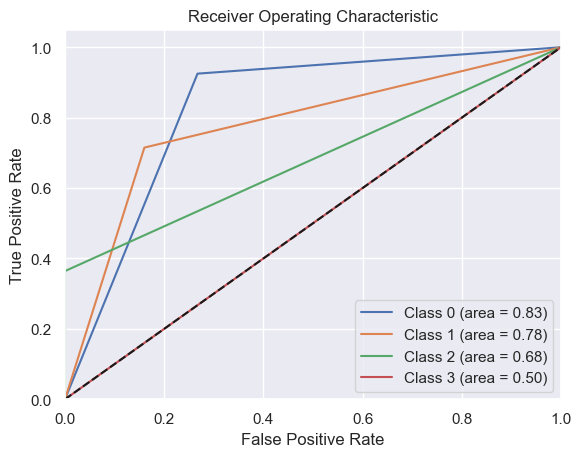

In [55]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true, y_pred, num_classes):
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
    y_pred_bin = label_binarize(y_pred, classes=list(range(num_classes)))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curves(test_y, y_pred_test, num_classes=4)

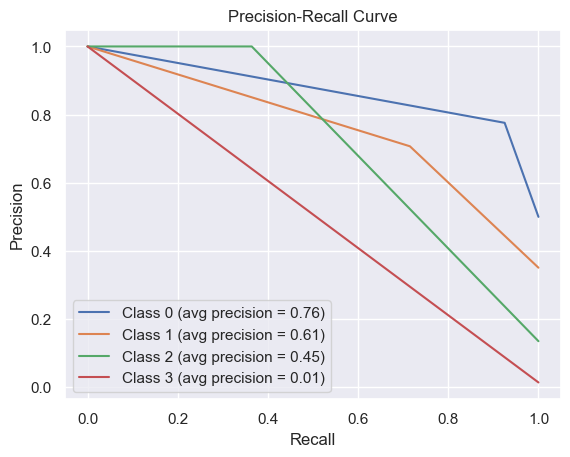

In [57]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves(y_true, y_pred, num_classes):
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
    y_pred_bin = label_binarize(y_pred, classes=list(range(num_classes)))

    precision = dict()
    recall = dict()
    avg_precision = dict()
    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
        avg_precision[i] = average_precision_score(y_true_bin[:, i], y_pred_bin[:, i])

    plt.figure()
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], label=f'Class {i} (avg precision = {avg_precision[i]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

plot_precision_recall_curves(test_y, y_pred_test, num_classes=4)

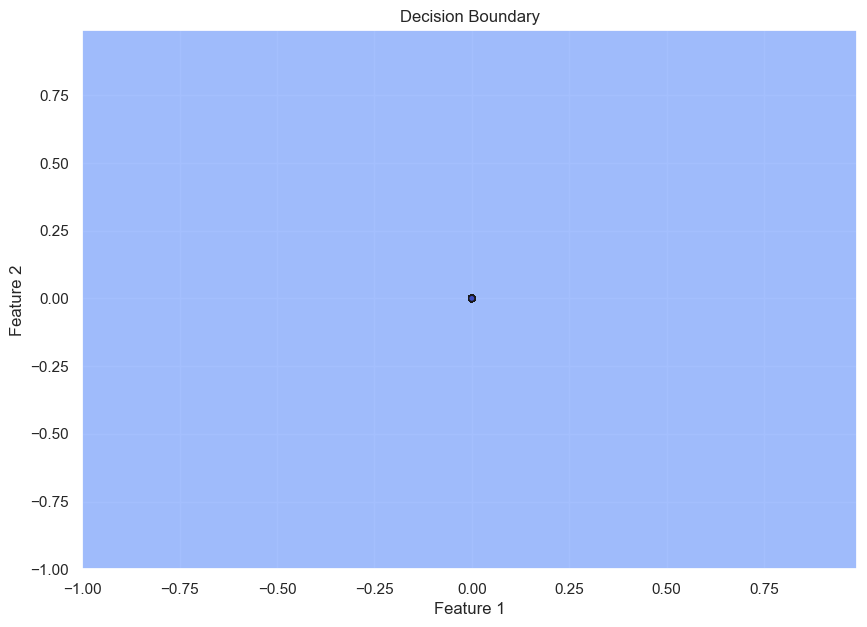

In [61]:
import numpy as np

# Select two features for plotting
plot_x = train_x[:, :2]
plot_y = test_x[:, :2]

# Train the model again on these two features
clf_plot = svm.SVC(kernel='rbf')
clf_plot.fit(plot_x, train_y)

# Create a mesh grid
x_min, x_max = plot_x[:, 0].min() - 1, plot_x[:, 0].max() + 1
y_min, y_max = plot_x[:, 1].min() - 1, plot_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = clf_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(plot_x[:, 0], plot_x[:, 1], c=train_y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()